<h1 style="color:blue">Praktikum 7. </h1>

<h3 style="color:blue">Wordnet. Heatmap'i loomine. Word2vec. Pdf-i lugemine Pythonis.</h3>

## Wordnet

### Sünohulgad

**Wordnet** on leksikaal-semantiline andmebaas, mis sisaldab informatsiooni mõistete ja nendevaheliste semantiliste suhete kohta. Wordnette on tehtud paljudele keeltele. Rohkem informatsiooni Eesti Wordneti (EstWN) kohta, sh EstWNis kasutatavad semantilised suhted, leiab [siit](http://www.cl.ut.ee/ressursid/teksaurus/?lang=et). Muuhulgas on seal toodud kaks viidet, kuidas Wordnetist päringuid teha saab. Praktikumis käsitleme aga Wordneti Pythoni liidest, mille eeliseks on loomulikult kasutatavus oma programmikoodi sees. Dokumentatsioon on saadaval [siin](https://github.com/estnltk/estnltk/blob/main/tutorials/wordnet/wordnet.ipynb).

Wordneti põhiühik on **sünohulk** (või **sünonüümihulk**), mis koosneb kõigist ühte ja sama mõistet väljendavatest sõnadest (või sõnaühenditest). Sünohulgad on ühendatud **viidetega**, mis vastavad mõistetevahelistele **suhetele**. Kõige olulisemad (ehk Wordnetis kõige enam esindatud) suhted on **hüponüümia** ja **hüperonüümia** ehk alam- ja ülemmõisted. 

### Sünohulgad

Wordneti kasutamiseks tuleb importida vastav moodul ja luua Wordneti objekt:

In [1]:
from estnltk.wordnet import Wordnet

wn = Wordnet()

In [2]:
# sünohulkade saamine
for i, synset in enumerate(wn):
    if i == 10:
        break
    print(synset)

Synset('korda seadma.v.03')
Synset('korraldamine.n.03')
Synset('küsima.v.02')
Synset('küsimine.n.02')
Synset('kallutama.v.01')
Synset('laskma.v.04')
Synset('laskmine.n.03')
Synset('nõus olema.v.01')
Synset('informeerima.v.01')
Synset('informeerimine.n.02')


Wordnetis leidub leidub nimisõnu, verbe, adjektiive ja adverbe. Kui soovime kätte saada kindlat sõnaliiki sõnu, saame `synsets_with_pos` meetodile sõnaliigitunnust ette andes tekitada generaatori, üle mille itereerida.

In [3]:
adjectives = wn.synsets_with_pos('a')  # pärime omadussõnad

counter = 0
while counter < 25:
    print(next(adjectives))
    counter += 1

Synset('4D.a.01')
Synset('aadamaülikonnas.a.01')
Synset('aadellik.a.01')
Synset('aasaline.a.01')
Synset('aasia.a.01')
Synset('aasiv.a.01')
Synset('aastane.a.01')
Synset('aastane.a.02')
Synset('aastaringne.a.01')
Synset('aastatepikkune.a.01')
Synset('aastatetagune.a.01')
Synset('aateline.a.01')
Synset('aatomi-.a.01')
Synset('abdominaalne.a.01')
Synset('aberrantne.a.01')
Synset('abi-.a.01')
Synset('abielus.a.01')
Synset('abiogeenne.a.01')
Synset('abiootiline.a.01')
Synset('abiotsiv.a.01')
Synset('abistav.a.01')
Synset('abitu.a.01')
Synset('abitu.a.02')
Synset('ablas.a.01')
Synset('ablas.a.02')


Pärida saab ka sünohulki, kus leidub kindel sõna:

In [4]:
koerad = wn['koer']
koerad

["Synset('distsiplineerimatu.a.01')",
 "Synset('kodukoer.n.01')",
 "Synset('kaak.n.01')",
 "Synset('koer.n.03')"]

või kus sõnal on soovitud sõnaliik:

In [5]:
t2na = wn['täna']
t2na_r = wn['täna', 'r']  # pärime adverbi

In [6]:
t2na

["Synset('täna.r.01')", "Synset('täna.r.02')", "Synset('täna.n.01')"]

In [7]:
t2na_r

["Synset('täna.r.01')", "Synset('täna.r.02')"]

Üks sõna kuulub sageli mitmesse sünohulka, sünohulka omakorda kuulub enamasti mitu sünonüümset lemmat.
Selleks, et sünohulkade tähendusi eristada, saame vaadata definitsiooni:

In [8]:
for tee in wn['tee']:
    print(tee, '--', tee.definition)

Synset('koos.n.01') -- mingisse punkti või kohta juhtiv joon; sõidu-, kulgemissuund
Synset('abinõu.n.01') -- mingile eesmärgile suunatud, selle saavutamiseks rakendatud tegevus
Synset('rada.n.03') -- veebiaadressi puhul see osa veebiaadressist, mis määrab ära otsitava faili asukoha kataloogisüsteemis ehk failini viiva tee
Synset('rada.n.02') -- miski, mida mööda saab minna ühest kohast teise
Synset('tee.n.05') -- jook, mida saadakse (purustatud) teelehtede leotamisel vees
Synset('liikumistee.n.01') -- väljakujunenud tee liikumiseks, reisimiseks
Synset('tee.n.07') -- mingi liin, mida mööda sõidetakse, reisitakse
Synset('tee.n.08') -- teepõõsa ja muude taimede kuivatatud lehed, pungad, varred või õied joogi valmistamiseks
Synset('pöördustee.n.01') -- faili poole pöördumisel (näit. opsüsteemist) läbitavate hierarhiliste kataloogide jada


In [9]:
# sõna sünohulkade arv
len(wn['tee'])

9

Konkreetsesse sünohulka kuuluvaid lemmasid saame pärida indekseid kasutades, näiteks nii:

In [10]:
wn['tee'][0].lemmas

['koos', 'kurss', 'orientatsioon', 'siht', 'suund', 'tee']

### Ülesanne 1. Uurime Wordnet'i (1p)
Kirjutage kood, mis loeb sisse faili "parasiitlusest.txt", lemmatiseerib teksti (ehk morfoloogiline analüüs tavalise, lausepõhise ühestamisega), eemaldab ***lemmade*** hulgast kirjavahemärgid ning leiab allesjäänud lemmadele Wordneti liidese abil sünohulgad (täpsustan: ***unikaalsetele lemmadele***, pole vaja samale lemmale mitut päringut teha). Vastake järgmistele küsimustele:

a) Mitmel % lemmadest on Wordnetis enam kui üks sünohulk?

b) Mitmel % lemmadest ei ole Wordnetis ühtegi vastet?

c) Millised on % sõnaliigiti? Ehk mitu % nimisõnadest, omadussõnadest jne puudub Wordnetis sünohulk + leida ka need sõnaliigid, mille kõikidel sõnadel LEIDUS sünohulk!)

d) Mitu tähendust (sünohulka) leitakse iga lemma kohta keskmiselt? Ehk sünohulkade arv/lemmade arv.

Ehk töökäigus on teil vaja:
1. salvestada lemma ja selle sõnaliik
2. leida mitmel sõnal on rohkem kui 1 sünohulk
3. leida mitmel sõnal pole ühtki sünohulka
4. leida, mitu sünohulka teil üldse kokku

***OLULINE***:
- Kui mitmesel sõnal on erinevad lemmad (nt levima/levinud), siis tuleks sünohulgad leida ***kõikidele lemmadele eraldi***.



### Sünohulkade suhted: ülem- ja alammõisted

Leiame varem päritud koera sünohulkade ülemmõisted e hüperonüümid:

In [11]:
for k in koerad:
    print(k.hypernyms)

[]
["Synset('koduloom.n.01')"]
["Synset('huligaan.n.01')"]
["Synset('tarberiist.n.01')"]


ja alammõisted e hüponüümid:

In [12]:
for k in koerad:
    print(k.hyponyms)

[]
["Synset('krants.n.01')", "Synset('sitsija.n.01')", "Synset('jahikoer.n.01')", "Synset('abikoer.n.01')", "Synset('veokoer.n.01')", "Synset('hulkurkoer.n.01')", "Synset('toakoer.n.01')", "Synset('kelgukoer.n.01')", "Synset('karjakoer.n.01')", "Synset('jälituskoer.n.01')", "Synset('hoovikoer.n.01')", "Synset('teenistuskoer.n.01')", "Synset('klähvats.n.01')", "Synset('rakats.n.01')", "Synset('puli.n.01')", "Synset('ajukoer.n.01')", "Synset('tõukoer.n.01')", "Synset('koeraklutt.n.01')", "Synset('hatt.n.02')", "Synset('rakats.n.02')", "Synset('spits.n.01')"]
[]
[]


Eraldi meetodid on ka holonüümide ja meronüümide e osa-terviku suhtes olevate sünohulkade leidmiseks.

In [13]:
for k in koerad:
    print(k.holonyms)
    print(k.meronyms)

[]
[]
["Synset('koerakuut.n.01')"]
[]
[]
[]
[]
[]


Kõigi suhete leidmiseks on võimalik kasutada get_related_synsets(), mis tagastab listi seotud sünohulkadest nende suhetega

In [14]:
for k in koerad:
    print(k.get_related_synset())
    print()

[("Synset('faktilugu.n.01')", 'domain_topic'), ("Synset('ebakorrektne.a.01')", 'similar'), ("Synset('kaak.n.01')", 'similar')]

[("Synset('koeravõitlus.n.01')", 'agent'), ("Synset('haukumine.n.02')", 'agent'), ("Synset('sitsimine.n.01')", 'agent'), ("Synset('koeralik.a.01')", 'also'), ("Synset('koduloom.n.01')", 'be_in_state'), ("Synset('koduloom.n.01')", 'hypernym'), ("Synset('bioloogia.n.01')", 'domain_topic'), ("Synset('koerlane.n.01')", 'holo_member'), ("Synset('koerakuut.n.01')", 'holonym'), ("Synset('krants.n.01')", 'hyponym'), ("Synset('sitsija.n.01')", 'hyponym'), ("Synset('jahikoer.n.01')", 'hyponym'), ("Synset('abikoer.n.01')", 'hyponym'), ("Synset('veokoer.n.01')", 'hyponym'), ("Synset('hulkurkoer.n.01')", 'hyponym'), ("Synset('toakoer.n.01')", 'hyponym'), ("Synset('kelgukoer.n.01')", 'hyponym'), ("Synset('karjakoer.n.01')", 'hyponym'), ("Synset('jälituskoer.n.01')", 'hyponym'), ("Synset('hoovikoer.n.01')", 'hyponym'), ("Synset('teenistuskoer.n.01')", 'hyponym'), ("Synset('k

Argumendina saab ette anda ka kindla suhte:

In [15]:
for k in koerad:
    print(k.get_related_synset('be_in_state'))

[]
["Synset('koduloom.n.01')"]
["Synset('huligaanitsev.a.01')"]
[]


Kui me ei soovi ainult konkreetse sünohulga lemmasid, vaid näiteks ka hüponüümide, hüponüümide hüponüümide jnejne lemmasid (nt et leida kõikvõimalikud jalatseid tähistavad sõnad), saame kasutada `closure()` meetodit. Sel juhul tuleb ka täpsustada, missugust sünohulkadevahelist suhet vaatame. 

In [16]:
liblikas = wn['liblikas'][0]

# Kui anname ette ainult suhte, saame kõik selle suhtega seotud "päritud" sünohulgad 
liblikas.closure('hyponym')

["Synset('mähkurlane.n.01')",
 "Synset('vaksik.n.01')",
 "Synset('võsavaksik.n.01')",
 "Synset('sügisvaksik.n.01')",
 "Synset('külmavaksik.n.01')",
 "Synset('hallavaksik.n.01')",
 "Synset('hiidvaksik.n.01')",
 "Synset('kuuvaksik.n.01')",
 "Synset('ööliblikas.n.01')",
 "Synset('männivaksik.n.01')",
 "Synset('koerliblikas.n.01')",
 "Synset('kapsaliblikas.n.01')",
 "Synset('admiral.n.02')",
 "Synset('silmik.n.01')",
 "Synset('öölane.n.01')",
 "Synset('täpik.n.01')",
 "Synset('rohetäpik.n.01')",
 "Synset('leedik.n.01')",
 "Synset('kirjuleedik.n.01')",
 "Synset('jahuleedik.n.01')",
 "Synset('kapsaleedik.n.01')",
 "Synset('kärjeleedik.n.01')",
 "Synset('tubakaleedik.n.01')",
 "Synset('käbileedik.n.01')",
 "Synset('niiduleedik.n.01')",
 "Synset('surulane.n.01')",
 "Synset('klaastiib.n.01')",
 "Synset('vaarikaklaastiib.n.01')",
 "Synset('kedrik.n.01')",
 "Synset('eistekedrik.n.01')",
 "Synset('männikedrik.n.01')",
 "Synset('aia-rõngakedrik.n.01')",
 "Synset('varreleedik.n.01')",
 "Synset('koi.

In [17]:
# Kui anname ette ka arvu, saame täpsustada, mitme taseme kaugusi suhteid vaatame.
# 1 annab meile vahetult seotud suhted
liblikas.closure('hypernym', 1)

["Synset('insekt.n.01')"]

In [18]:
liblikas.closure('hypernym', 3)

["Synset('insekt.n.01')",
 "Synset('artropood.n.01')",
 "Synset('selgrootu.n.01')"]

### Ülesanne 2. Kes on teksti peategelane? (1,5p)
Ülesanne on leida, millist olendit on kõige enam selles tekstis mainitud. Sisendfail on "telegram.txt". Ülesande lahendamiseks tee järgmist:
* vaikeväärtustega morf analüüs
* leidke tekstist kõik ***nimisõnade lemmad***
* leidke wordnetist kõik olendeid tähistavad sõnad. Selleks kasutage sünohulka "olend.n.01" (leiate sõna *olend* kaudu) - leidke selle kõik alamsünohulgad `closure()` abil ning seejärel salvestage kõikide nende sünohulkade lemmad (***vt ka all NB'd***)
* kontrollige, millised tekstis esinenud nimisõnadest lemmad kuuluvad olendite hulka
* leidke nendest kõige sagedasem (EHK TOP ÜKS!)
* mitmese lemma puhul tuleb **kõiki** eraldi kontrollida! See tähendab seda, et mõni tekstisõna võib saada mitu analüüsi, nt 'tulnukasse' saab lemmaks 'tulnuk' ja 'tulnukas'. Mõlemate puhul tuleb vaadata, kas tegu substantiiviga või mitte. 

NB! "Olend" sünohulgast kõigi alluvate pärimine võib olla aeganõudev protsess (u 10 min). Kuna edaspidi läheb olendite nimekirja mitmel korral vaja, on mõistlik kõik olendeid tähistavad lemmad faili kirjutada (olend per rida). Olendeid peaks olema ~20k.

Ülesande väljund: genereerib olendite faili + ``print(most_common(1))``

### Sünohulkadevahelised kaugused

Lisaks hüpo- ja hüperonüümide leidmisele on võimalik leida ka kahe sünohulga lähim ülemmõiste või nendevaheline kaugus - see peaks näitama, kui sarnased sõnad omavahel on.

Lähima ülemmõiste leidmine sünohulkadele "koer.n.01" ja "kass.n.01":

In [19]:
koer =  wn['koer'][1]
kass = wn['kass'][0]

In [20]:
wn.lowest_common_hypernyms(kass, koer)

["Synset('koduloom.n.01')"]

Omavahel pole kindlasti ühendatud eri sõnaliikidest sõnad, aga ka kõigil samast sõnaliigist sõnadel pole ühist ülemmõistet:

In [21]:
room = wn['rõõm'][0]

In [22]:
wn.lowest_common_hypernyms(koer, room)

Sünohulkade vaheliste kauguste leidmiseks on Wordnetis kolm eri mõõdikut
* `path_similarity()`: return a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy
* `lch_similarity()`: Leacock-Chodorow Similarity returns a score denoting how similar two word senses are, based on the shortest path that connects the senses (as above) and the maximum depth of the taxonomy in which the senses occur.  
* `wup_similarity()`: Wu-Palmer Similarity returns a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node). 

Kui soovi, siis selgitusi vaata lähemalt [siit](http://www.nltk.org/howto/wordnet.html) "Similarity" alamjaotuse alt.

In [23]:
wn.path_similarity(koer, room)

0.037037037037037035

In [24]:
wn.path_similarity(koer, kass)

0.3333333333333333

In [25]:
wn.lch_similarity(koer, room)

-0.03774032798284711

In [26]:
wn.lch_similarity(koer, kass)

2.159484249353372

In [27]:
wn.wup_similarity(koer, room)

In [28]:
wn.wup_similarity(koer, kass)

0.8888888888888888

### Ülesanne 3. Sarnased ja erinevad - Wordnet (1,75p)
Kuivõrd ühtivad Wordneti kaugusmõõdikute alusel sarnased sõnad sellega, mida me ise sarnaseks peame? Teeme väikse katse, leides 20 sõna omavahelised kaugused ja visualiseerides tulemusi, et nende hoomamine lihtsam oleks.

Valime katsealusteks seekord anekdooditegelased. Failist "anekdoodid.csv" leiate Eesti Kirjandusmuuseumi [anekdoodiandmebaasist](http://www.folklore.ee/~liisi/o2/) korjatud anekdoodid (ärge unustage, et andekdoote tuleb lemmatiseerida). Kasutades **eelmises ülesandes loodud olendite listi**, leidke 20 kõige sagedamini anekdootides esinevat olendit. Kui eelmine ülesanne ei õnnestunud, siis kasuta olendid_lisamaterjal.txt.

Kuna Wordnetis saab võrrelda ainult **sünohulkadevahelisi** kaugusi, mitte aga lemmadevahelisi, siis leidke nendele 20 lemmale vastavad sünohulgad ning nende kõikide sünohulkade omavahelised kaugused. Edasise visualiseerimise huvides tasub koguda need andmed, kas pandase *dataframe*'i või mõnda andmestruktuuri, millest on lihtne moodustada *dataframe*'i - näiteks sõnastikku, mille väärtusteks on sõnastikud (vt ka visualiseerimise näidet allpool). Sõna/sünohulga kaugus iseendaga määrake käsitsi (aga see väärtus peab ilmselgelt olema miinusmärgiga) - see võimaldab huvitavamatel juhtudel visuaalselt paremini esile tulla.

Visualiseerige tulemused *heatmap*'ina. Rea- ja veerunimedeks peaksid olema lemmad, mitte sünohulgad (vihje `synohulk.name`).

**Ehk lühidalt ja maakeeles:** laske andekdootidele morfanalüüs peale, seejärel eraldage need nimisõnad, mis olid ühtlasi ka olendite nimekirjas. Väljastage TOP 20 andekdootides esinevat olendit. Nüüd leiate nende TOP 20 olendi sünohulgad ja nende sünohulkade omavahelised kaugused. Ehk kui sul on järjend `[el1, el2, el3, el4]`, siis leiad kaugused: `el1.kaugus(el2)`, `el1.kaugus(el3)`, `el1.kaugus(el4)`, `el2.kaugus(el3)`, `el2.kaugus(el4)`, `el3.kaugus(el4)`

LÕPLIK VÄLJUND:
1. top 20 anekdootides esinevat olendit
2. heatmapi joonis, kus kõikide sünohulkade nimed veergude ja ridade "pealkirjad"



Vihjeid:
* kaugusmõõdikuna kasutage ükskõik millist ülaltoodutest
* heatmap'i loomisel on abiks [_seaborn_](https://seaborn.pydata.org/) teek. Installimine käib tavapäraselt:
`conda install seaborn`

##### Heatmap'i loomine seaborn teegi abil

In [29]:
# Impordime teegi (peab eelnevalt installima!)
import seaborn as sns
import pandas as pd

In [30]:
# Mänguandmestik visualiseerimisnäite jaoks
d = {'õun': {'pirn': 2, 'kirss': 1}, 'pirn': {'kirss': 3, 'õun': 2}, 'kirss': {'õun': 1, 'pirn': 3}}

In [31]:
df = pd.DataFrame.from_dict(d)

In [32]:
df

,õun,pirn,kirss
pirn,2.0,NaN,3.0
kirss,1.0,3.0,NaN
õun,NaN,2.0,1.0


<Axes: >

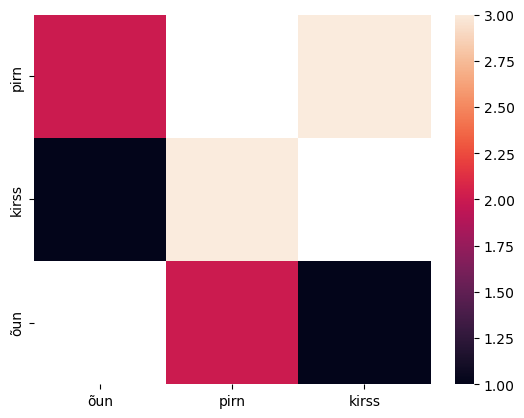

In [33]:
sns.heatmap(df)

Soovi korral saame muuta värve või muid kujunduselemente - värvide kohta vt [siit](https://seaborn.pydata.org/tutorial/color_palettes.html)

<Axes: >

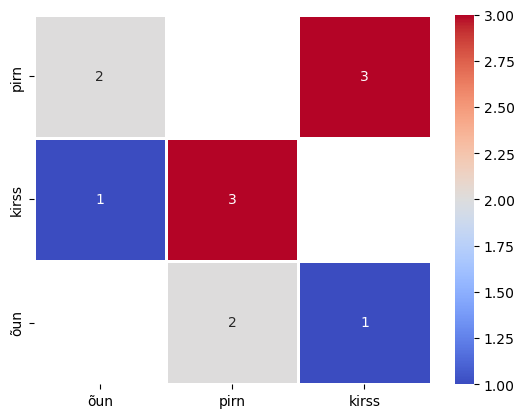

In [34]:
sns.heatmap(df, cmap = 'coolwarm', linewidths=1.0, annot=True)

### KIRJUTA ÜL 3 KOOD SIIA:
sh kõik importkäsud!

#### Wordneti varjukülg

Vaadake ülesandes 3 loodud *heatmap*'i. Kas sõnade sarnasused vastavad sellele, mida oma intuitsiooni põhjal arvaksite? 

Vaadake ka järgmisi näiteid:

In [35]:
eestlane = wn['eestlane'][0]
viljandlane = wn['viljandlane'][0]
majaelanik = wn['majaelanik'][0]

In [36]:
wn.path_similarity(majaelanik, viljandlane)

0.3333333333333333

In [37]:
wn.path_similarity(eestlane, viljandlane)

0.06666666666666667

In [38]:
majaelanik.hypernyms

["Synset('asukas.n.01')"]

In [39]:
viljandlane.hypernyms

["Synset('asukas.n.01')"]

In [40]:
eestlane.hypernyms

["Synset('baltimaalane.n.01')"]

In [41]:
wn.lowest_common_hypernyms(eestlane, viljandlane)

In [42]:
viljandlane.get_related_synset()

[("Synset('asukas.n.01')", 'hypernym'),
 ("Synset('viljandilanna.n.01')", 'hyponym'),
 ("Synset('eestimaalane.n.01')", 'similar')]

Ühesõnaga, Wordneti hierarhia ei vasta alati intuitsioonile. Õnneks on aga olemas ka teisi viise sõnade sarnasuse hindamiseks. Järgnevalt katsetame mudelit [word2vec](https://en.wikipedia.org/wiki/Word2vec).

### *Word2vec*

*Word2vec*'i (W2V) mudel põhineb **distributiivsushüpoteesil**: sarnase distributsiooniga lingvistilised üksused on ka semantiliselt sarnased. Teisisõnu, sarnastes kontekstides esinevad sõnad on sarnase tähendusega. Kuna siin kursusel me masinõppe teoreetilise poolega ei tegele, siis võtame *word2vec*'i kui musta kasti ega süvene praegu sellesse, kuidas kontekstide sarnasusi arvutatakse. Kui aga on siiski huvi rohkem teada, siis saab näiteks [siit](https://www.distilled.net/resources/a-beginners-guide-to-word2vec-aka-whats-the-opposite-of-canada/).

Nagu enamiku masinõppealgoritmide puhul, on ka W2V jaoks oluline omada võimalikult palju andmeid. Mida rohkem andmeid, seda aeglasem on aga mudelite treenimine. Seetõttu on eesti keele jaoks olemas mitu juba suurte korpuste peal valmis treenitut mudelit, mida leiab [siit](https://github.com/estnltk/word2vec-models/blob/master/README.md) ja [siit](https://github.com/eleriaedmaa/embeddings).

Meie aga katsetame järgmises ülesandes ise oma mudeli treenimist väiksel korpusel. W2V mudelite loomisel on abiks teek [_gensim_](https://radimrehurek.com/gensim/), mille uusima versiooni saab installida käsurealt läbi pip'i:
`pip install --upgrade gensim`

VÕI:

In [43]:
# import sys
# !{sys.executable} -m pip install gensim

Mudeli loomiseks tuleb *word2vec*'ile ette anda n-ö kontekstide listina oma korpus. Näiteks, kui korpuseks on tekst

"Mari sööb õuna. Jüri ei söö õuna. Jüri sööb pirni."

ja kontekstiks lause, siis tuleks korpus ette anda kujul

In [44]:
corpus = [['Mari', 'sööb', 'õuna', '.'], ['Jüri', 'ei', 'söö', 'õuna', '.'], ['Jüri', 'sööb', 'pirni', '.']]

Mudeli treenimiseks on meetod Word2Vec():

In [45]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, min_count = 1)

INFO:word2vec.py:582: collecting all words and their counts
INFO:word2vec.py:565: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:word2vec.py:588: collected 8 word types from a corpus of 13 raw words and 3 sentences
INFO:word2vec.py:637: Creating a fresh vocabulary
INFO:utils.py:448: Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 8 unique words (100.00% of original 8, drops 0)', 'datetime': '2024-02-13T11:39:53.790685', 'gensim': '4.3.2', 'python': '3.9.17 (main, Jul  5 2023, 20:47:11) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
INFO:utils.py:448: Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 13 word corpus (100.00% of original 13, drops 0)', 'datetime': '2024-02-13T11:39:53.790685', 'gensim': '4.3.2', 'python': '3.9.17 (main, Jul  5 2023, 20:47:11) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
INFO:word2vec.py:745: deleting th

*min_count* parameeter määrab, mitu korda minimaalselt peab sõna korpuses esinema – vaikimisi on see 5, aga kuna praeguses "korpuses" ükski sõna nii palju ei esine, siis kasutame siin näites 1. (Ise mudelit treenides võite katsetada erinevaid variante.)

Kui mudel on valmis, saamegi hakata sõnade sarnasusi küsima. Meetod *similarity()* annab meile sõnade kontekstivektorite koosinussarnasuse, mis varieerub -1-st 1-ni (kõige sarnasem).

In [46]:
model.wv.similarity("Mari", "Jüri")

-0.115555435

In [47]:
model.wv.similarity("Mari", "pirni")

-0.028491035

### Ülesanne 4. Sarnased ja erinevad - Word2vec (1,75p)

Looge _gensim_ teegi abil anekdootide korpuse põhjal oma word2vec mudel, leidke anekdooditegelaste vahelised sarnasusnäitajad ning visualiseerige tulemused nii, nagu eelmiseski ülesandes.

* Korpusena kasutage anekdoote failist "anekdoodi_minikorpus.csv", 
* Kontekstina kasutage lauset (lausestamisel aitab loomulikult EstNLTK) ehk võtate ette lausekihi, itereerite üle lausete ja üle iga lause sõnade, ning vaatate selle lemmat!
* Lemmatiseerige anekdoodid ja salvestage lause kaupa listidesse. Mitmeste lemmade puhul valige esimene. Lõpuks lähevad kõik lause listid ühte suurde listi (see on teie word2veci sisend).

  <=== need sammud on kõige aeganõudvamad. Kui kood jookseb >15minutit, siis võta vähem andekdoote sisendiks. ===>
----------------------------------------------------------------
* Treenige word2vec'iga oma mudel.
* Treenitud mudeli põhjal leidke kõigi 20 sagedasema anekdooditegelase omavahelised sarnasusnäitajad. Ehk siis `model.wv.similarity(TOP20 olend1, TOP20 olend2)` jne. Lemma ja tema enda sarnasust ärge arvestage (jätke märkimata).
* Visualiseerige tulemus heatmap'ina


VÄLJUND:
1. uus heatmap
2. paar lausega vastake küsimusele: milliseid sarnasusi-erinevusi märkate võrreldes eelmise ülesande tulemustega?



### Pdf-i lugemine Pythonis

Paljud arhiveeritud dokumendid ning teadusartiklid talletatakse PDF formaadis. Need näevad inimsilma jaoks head välja (sest mis ilust saame me rääkida näiteks csv, json-i või txt formaadi puhul?), ent automaattöötluse seisukohast on see ilu pigem nuhtluseks. Pdf-dokumentide sisemine struktuur võib olla väga erinev, sõltuvalt sellest, kuidas ja milliste vahenditega dokument loodud on (kui pdf-i siseelu lähemalt huvitab, saab sellest lugeda näiteks [siit](https://web.archive.org/web/20141010035745/http://gnupdf.org/Introduction_to_PDF)). 

Isegi kui jätame praegu kõrvale juhtumid, kus dokumendid on saadud nt skannimise teel ja tegemata on optiline tekstituvastus (sellest tuleb juttu 12. praktikumis), on pdf-ide programmaatiline lugemine paras peavalu. Seega, parim nõuanne pdf-ist teksti (või ka muude üksuste - tabelite jms) ekstraheerimise osas oleks mitte seda teha - kui vähegi võimalik, püüda andmed hankida sellisel kujul, nagu nad olid enne pdf-iks muutmist. Kui see aga siiski võimalik ei ole, siis on olemas mõned Pythoni tööriistad, mis siiski abiks on.

Hinnatuimad teegid pdf-ide töötlemiseks Pythonis on [_pyPDF2_](https://github.com/mstamy2/PyPDF2) ja [_pdfminer_](https://github.com/euske/pdfminer). Seejuures on kummalgi ka omad plussid ja miinused. _PyPDF2_ on baastööriist, millel ei ole palju võimalusi, ent seda on lihtne kasutada ja see on hästi dokumenteeritud. Saadaval condast nii Windowsile kui Linuxile järgnevalt:

`conda install -c conda-forge pypdf2`

_Pdfminer_ oli originaalis saadaval vaid Python 2-le, Python 3 jaoks on olemas versioon [_pdfminer3k_](https://github.com/jaepil/pdfminer3k), mis on originaaliga võrreldes veel kehvemini dokumenteeritud ega ole ka täpselt samasuguse liidesega. Samas pakub _pdfminer_ rohkem võimalusi, et edukalt oma pdf-ist tekst ikkagi kätte saada. _Pdfminer3k_ on saadaval condast käsuga:

`conda install -c conda-forge pdfminer3k`

### Boonusülesanne. (1p)
Uurige, kuidas töötavad teegid *pypdf2* ja *pdfminer*. Katsetage mõlemaga teksti eraldamist failidest "artikkel.pdf" ja "kohtulahend.pdf". Kirjeldage tulemust. (Pdfmineri puhul võib kasutada ka Python 2-le loodud versiooni, millele leidub rohkem dokumentatsiooni - sel juhul on vaja luua esmalt uus conda keskkond, kuhu oleks installitud python2).

**NB!** Kui installite python2 oma tavapäraselt kasutatavasse conda keskkonda, siis sealt eemaldatakse python3 ja vajalikud asjad enam ei tööta.

(Kummagi teegi katsetamine annab 0,5p.)